In [1]:
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torchvision
import torch
from torch import nn
import os
import pandas as pd
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn

## A Simple Neural Network

In [2]:
x1 = torch.randint(1, 100, (100,)) #min, max, size
x2 = torch.randint(1, 100, (100,))

y = (2*x2+5*x1) # we need to find this formula
#y = [(torch.square(y))*111 for y in y] 

data = {'Feature 1': x1, 'Feature 2': x2, 'Y': y}
df = pd.DataFrame(data)

print(df)


    Feature 1  Feature 2    Y
0          37         50  285
1          90         17  484
2           6         44  118
3          97         26  537
4           7          2   39
..        ...        ...  ...
95          7         20   75
96         16         80  240
97         46         69  368
98         68         64  468
99         66         64  458

[100 rows x 3 columns]


In [3]:
#loc[#Rows, #Columns], loc is label-based
#iloc[:, index], iloc is integer-based

#print(df.loc[0]) # Gives the entire row

#Fetch row as well as columns
# print(df.loc[0:5, "Feature 2"])

print(f" Feature 1: {df.iloc[0, 0]}")
print(f" Feature 2: {df.iloc[0, 1]}")


 Feature 1: 37
 Feature 2: 50


In [4]:
# Train, Validate, Test split

train_data = df.iloc[0:60, :]
# print(train_data)
validate_data = df.iloc[60:80, :]
test_data = df.iloc[80:100, :]


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1),
        )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
)


In [7]:
# Initialized weights and biases
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([10, 2]) | Values : tensor([[-0.2387, -0.3420],
        [ 0.2009,  0.6936]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([10]) | Values : tensor([-0.6243,  0.0203], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([5, 10]) | Values : tensor([[-0.1621,  0.1016,  0.2972,  0.2417, -0.2186, -0.0628, -0.2029,  0.1840,
         -0.2025,  0.1911],
        [-0.3063,  0.0881, -0.3028,  0.2012, -0.1594, -0.3139,  0.0430, -0.0671,
          0.1912,  0.1274]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([5]) | Values : tensor([-0.2769, -0.0100], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([1, 5]) | Values : tensor([[ 0.1709,  0.0318,  0.2271,  0.1976, -0.3184]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.bias | Size: torch.Size([1]) | Values : tensor([-0.3139], grad_fn=<SliceBackward0>) 



In [8]:
# Change hyperparameters only for Validation dataset

learning_rate = 1e-3
#batch_size = 2
epochs = 200

<table>
    <tr>
        <th>Problem Statement</th>
        <th>Hidden Layer</th>
        <th>Output Layer</th>
        <th>Loss Function</th>
    </tr>
    <tr>
        <td>Regression</td>
        <td>ReLU</td>
        <td>Linear</td>
        <td>MSE/MAE/Kuber</td>
    </tr>
    <tr>
        <td>Binary Classification</td>
        <td>ReLU</td>
        <td>Sigmoid</td>
        <td>Binary Cross Entropy</td>
    </tr>
    <tr>
        <td>Multiclass Classification</td>
        <td>ReLU</td>
        <td>Softmax</td>
        <td>Categorical/Sparse Cross Entropy</td>
    </tr>
</table>

In [9]:
# Initialize the loss function
loss_fn = nn.MSELoss()

# Use Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
def train_loop():
    size = len(train_data)
    #print(size)

    accumulate_loss = 0
    for i in range(size): 
        
        feature1 = torch.tensor(train_data.iloc[i, 0]).float()
        feature2 = torch.tensor(train_data.iloc[i, 1]).float()
        y = torch.tensor(train_data.iloc[i, 2]).float()

        X = torch.stack([feature1, feature2], dim=0) #nn.Sequential... nn.Linear(2, 10),

        pred = model(X)
        # print(type(pred))
        # print(type(y))
        loss = loss_fn(pred, y)
    
        # Backpropagation
        loss.backward() # Find Gradients
        optimizer.step() # Update weights
        optimizer.zero_grad()

    
        accumulate_loss += loss.item()

    return accumulate_loss/size
            

In [11]:
def validate_loop():
    size = len(validate_data)

    accumulate_loss = 0
    for i in range(size): 
        
        feature1 = torch.tensor(validate_data.iloc[i, 0]).float()
        feature2 = torch.tensor(validate_data.iloc[i, 1]).float()
        y = torch.tensor(validate_data.iloc[i, 2]).float()

        X = torch.stack([feature1, feature2], dim=0)

        pred = model(X)
        loss = loss_fn(pred, y)
    
        accumulate_loss += loss.item()

    return accumulate_loss/size

/home/deb/Softwares/PyTorchEnv/lib/python3.8/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1 - Training Loss: 141144.01715901692, Validation Loss: 152026.726953125
Epoch 2 - Training Loss: 131708.69645792645, Validation Loss: 138016.3791015625
Epoch 3 - Training Loss: 115258.67358398438, Validation Loss: 114989.25849609375
Epoch 4 - Training Loss: 90347.49402872722, Validation Loss: 83143.1478515625
Epoch 5 - Training Loss: 59308.69246470134, Validation Loss: 48386.56140136719
Epoch 6 - Training Loss: 30144.315710639952, Validation Loss: 21094.156298828126
Epoch 7 - Training Loss: 11889.97274601857, Validation Loss: 8225.403221797944
Epoch 8 - Training Loss: 5127.024030405903, Validation Loss: 4442.656161463261
Epoch 9 - Training Loss: 3317.039415866385, Validation Loss: 3218.241344404407
Epoch 10 - Training Loss: 2567.6628033161164, Validation Loss: 2506.6317295074464
Epoch 11 - Training Loss: 2036.8928862998882, Validation Loss: 1964.6903116226197
Epoch 12 - Training Loss: 1610.5095287164363, Validation Loss: 1530.090596294403
Epoch 13 - Training Loss: 1263.032515664

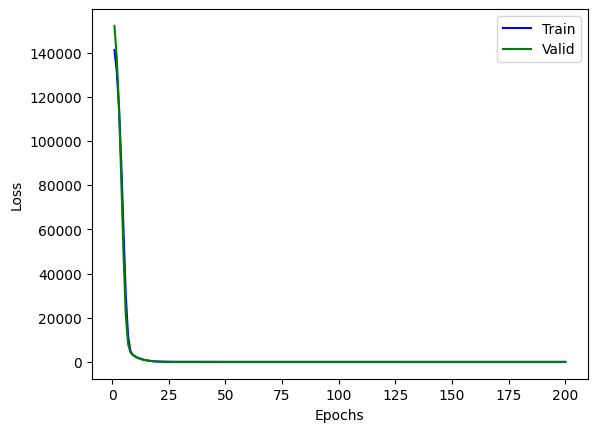

In [12]:
x = [x+1 for x in range(epochs)]

trainLossArr = []
validateLossArr = []


for i in range(epochs):
    
    # Train
    train_loss = train_loop()
    trainLossArr.append(train_loss)

    # Validate
    validate_loss = validate_loop()
    validateLossArr.append(validate_loss)

    print(f"Epoch {i+1} - Training Loss: {train_loss}, Validation Loss: {validate_loss}")
 
# print(x)
# print(trainLossArr)
plt.plot(x, trainLossArr, 'b', label="Train")
plt.plot(x, validateLossArr, 'g', label="Valid")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [13]:
torch.save(model.state_dict(), 'model.pt')
model.load_state_dict(torch.load('model.pt', weights_only=True))
#model.eval()

<All keys matched successfully>

In [22]:
size = len(test_data)

correct = 0
for i in range(size): 
    
    feature1 = torch.tensor(test_data.iloc[i, 0]).float()
    feature2 = torch.tensor(test_data.iloc[i, 1]).float()
    y = torch.tensor(test_data.iloc[i, 2]).float()

    X = torch.stack([feature1, feature2], dim=0)

    pred = model(X)

    if pred.squeeze().int() == y:
        correct += 1

accuracy = correct/size*100

print(f"Accracy: {accuracy}")




Accracy: 75.0


In [ ]:
# Manual Testing

x1 = torch.tensor(10, dtype=torch.float)
x2 = torch.tensor(20, dtype=torch.float)

print(x1)
print(x2)

X = torch.stack([x1, x2], dim=0)

print(X.shape)

pred = model(X)

print(pred)

## CNN

<a href="https://www.youtube.com/watch?v=l8_fZPHasdo">How we see color - RGB</a>

RGB Image Channels - 3<br/>
Grayscale Image Channels - 1

CNN Working:

![CNN](images/CNN.jpg)

In [ ]:
# Since a pixel can have values from 0 to 255 
# We create a 50x50 image and draw a Circle and a Straight line

gen_img = torch.ones([50, 50])*255

# Straight Line
for i in range(50):
    for j in range(50):
        if i == j:
            gen_img[i][j] = 0

# Circle
radius = torch.tensor(15)
center = 25

for i in range(90):
    # x = r * cos(θ)
    # y = r * sin(θ)

    tensor_i = torch.tensor(i)
    x = radius * torch.cos(tensor_i)
    y = radius * torch.sin(tensor_i)

    x = x.int()
    y = y.int()

    gen_img[x+radius][y-radius] = 0

print(gen_img)
print(gen_img.shape)
plt.imshow(gen_img, cmap="gray")
plt.show()

# Since it is a image it can also be downloaded
torchvision.utils.save_image(gen_img, './images/gen_img.jpg')

### YCbCr and RGB
<a href="https://www.youtube.com/watch?v=3dET-EoIMM8">YCbCr and RGB<a/>

In [ ]:
# Getting R G B individually from a image 
rgb_img = read_image('./images/RGB.jpg')

#red, green, blue = rgb_img # Can also be accessed with index no. - rgb_img[1]
#axs[i].imshow(red)

fig, axs = plt.subplots(1, 3, figsize=(6, 4))

rgb_list = ['Red', 'Green', 'Blue']

for i in range(len(rgb_list)):
    axs[i].imshow(rgb_img[i]) # Getting the 3 channels separately
    axs[i].set_title(rgb_list[i])


In [ ]:
img = read_image('./images/turtle.jpg')

print(f"Before grayscle: {img.shape}") # [3, 50, 50], Here 3 is channel
print(img.type) # Its a Tensor type

# RGB to Grayscale
img = torchvision.transforms.functional.rgb_to_grayscale(img, 1)
print(f"After grayscle: {img.shape}") # [3, 50, 50] -> [1, 50, 50]

img = img.squeeze() # Removes channel - [1, W, H] -> [W, H], all input of size 1 removed

print(f"Image shape after squeezing: {img.shape}")

In [ ]:
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
print(img)
#torchvision.utils.save_image(img, 'fp.jpg')

## CNN from PyTorch Documentation

In [2]:
# Custom Dataset from PyTorch Documentation
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

In [3]:
transform = transforms.Compose([
    # transforms.ToTensor(), 
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), 
    # transforms.Grayscale()
])

In [4]:
dataset = CustomImageDataset(img_dir = 'img_dir', 
                             annotations_file = 'labels.csv', 
                             transform = transform)

In [5]:
train_set, valid_set, test_set = torch.utils.data.random_split(dataset, [0.6, 0.2, 0.2])

In [6]:
train_dataloader = DataLoader(train_set, batch_size=1, shuffle=True)
valid_dataloader = DataLoader(valid_set, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=1, shuffle=True)

plt.imshow(img) cannot display image if it is [3, H, W] we use img.permute(1, 2, 0) to make it [H, W, 3] for displaying<br/>
<a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html">(M, N, 3)</a>

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].permute(1, 2, 0)
label = train_labels[0]

print(img.shape)
#print(img)
plt.imshow(img)
plt.show()
print(f"Label: {label}")

In [53]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.afterFlattenInputNeurons = 900

        # Image Shape - torch.Size([50, 50, 3])
        # Convolution Layer 1 (sees 50x50x3 image tensor)
        self.conv1 = nn.Conv2d(3, 100, 3, padding = 1) # 3 is Channel, 25 is output filtered image, 3 is filter size
        
        #After adding Maxpooling - dimensionality of the image will decrease
        # Formula: output_size = (input_size - filter_size + 1) / stride
        
        # Convolution Layer 2 (sees 25x25x25 image tensor), Here the last 25 is that mentioned in 2nd parameter of conv1
        self.conv2 = nn.Conv2d(100, 50, 3, padding = 1)
        # Convolution Layer 3 (sees 12x12x50 image tensor)
        self.conv3 = nn.Conv2d(50, 25, 3, padding = 1)

        self.pool = nn.MaxPool2d(2, 2) #(filter/kernel size, stride)

        self.activ = nn.ReLU()

        self.dropout = nn.Dropout(0.25)

        self.linear_stack = nn.Sequential(
            nn.Linear(self.afterFlattenInputNeurons, 100), 
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 2),
        )

    def forward(self, x):
        
        x = self.pool(self.activ(self.conv1(x)))
        x = self.pool(self.activ(self.conv2(x)))
        x = self.pool(self.activ(self.conv3(x)))
        
        # Comment below code to get x output shape from convolution
        # Flattening
        x = x.view(-1, self.afterFlattenInputNeurons)
        # Avoid overfitting
        x = self.dropout(x)
        x = self.linear_stack(x)
        return x

In [ ]:
model = CNN()
print(model)

In [ ]:
# ONLY TO GET LINEAR LAYER INPUT

dataIter = iter(train_dataloader)
# Get first item
img, label = next(dataIter)

# print(img.shape)

#afterFlattenInputNeurons
print("Dimension to be put in the first Linear layer", model.forward(img.float()).shape)
#Dimension to be put in the first Linear layer torch.Size([1, 20, 6, 6]) - 1x20x6x6 = 720


In [56]:
# Change hyperparameters only for Validation dataset

learning_rate = 1e-3
#batch_size = 2
epochs = 30

In [57]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()
# PyTorch's Cross Entrpy Function applies a Softmax function to the output layer
# So we do not mention Softmax activation function to the output layer 

# Use Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [58]:
def train_loop():
    size = len(train_dataloader)
    accumulate_loss = 0
    
    for img, label in train_dataloader: 
        # print(img)
        # print(label)

        pred = model(img.float())
        loss = loss_fn(pred, label)
    
        # Backpropagation
        loss.backward() # Find Gradients
        optimizer.step() # Update weights
        optimizer.zero_grad()

        accumulate_loss += loss.item()
        #train_loss = loss.item()

        
    return accumulate_loss/size

            

In [59]:
def valid_loop():
    size = len(valid_dataloader)
    accumulate_loss = 0
    
    for img, label in valid_dataloader: 

        pred = model(img.float())
        loss = loss_fn(pred, label)

        accumulate_loss += loss.item()
        #train_loss = loss.item()

        
    return accumulate_loss/size

In [ ]:
x = [x+1 for x in range(epochs)]

trainLossArr = []
validLossArr = []

for i in range(epochs):
    
    # Train
    train_loss = train_loop()
    trainLossArr.append(train_loss)

    # Valid
    valid_loss = train_loop()
    validLossArr.append(valid_loss)

    print(f"Epoch {i+1} - Training Loss: {train_loss}, Validation Loss: {valid_loss}")
 

plt.plot(x, trainLossArr, 'b', label="Train")
plt.plot(x, validLossArr, 'g', label="Valid")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
torch.save(model.state_dict(), 'model.pt')
model.load_state_dict(torch.load('model.pt', weights_only=True))
#model.eval()

In [ ]:
correct = 0
for img, label in test_dataloader:

    pred = model(img.float())

    if torch.argmax(pred) == label.squeeze():
        correct += 1
accuracy = correct/len(test_dataloader)*100
print(f"Accuracy: {accuracy}")
